- Exercici 1
Estandaritza, identifica i enumera cada un dels atributs / variables de l'estructura de l'arxiu "Web_access_log-akumenius.com" que trobaràs al repositori de GitHub "Data-sources".

Per identificar les variables dels registres log hem seguit aquest recurs: https://en.wikipedia.org/wiki/Common_Log_Format

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib as plt
import seaborn as sns

In [3]:
logs_df = pd.read_csv('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\Clon Github\\Data-Science\\Data-sources\\Web_access_log-akumenius.com.txt', sep='\n', encoding='utf-8', header=None)
logs_df[::10000]

,0
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
10000,www.akumenius.com 144.76.95.232 - - [23/Feb/20...
20000,www.akumenius.com 180.76.5.171 - - [23/Feb/201...
30000,www.akumenius.com 157.56.92.146 - - [23/Feb/20...
40000,www.akumenius.com 66.249.76.216 - - [23/Feb/20...
50000,www.akumenius.com 87.221.174.146 - - [24/Feb/2...
60000,www.akumenius.com 83.37.239.190 - - [24/Feb/20...
70000,www.akumenius.com 83.61.241.37 - - [24/Feb/201...
80000,www.akumenius.com 66.249.76.216 - - [24/Feb/20...
90000,www.akumenius.com 31.4.182.223 - - [25/Feb/201...


In [4]:
logs_df.shape

(261873, 1)

In [16]:
logs = logs_df.copy(deep=True)
logs.head()

,0
0,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
1,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
2,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
3,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...
4,localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 ...


A continuació, anirem creant columnes per les diferents variables dels registres

In [17]:
logs = logs[0].str.split(r'\s', n=1, expand=True)

In [18]:
logs.head()

,0,1
0,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OP..."
1,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OP..."
2,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OP..."
3,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OP..."
4,localhost,"127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OP..."


In [19]:
ip = logs[1].str.split(r'\s', n=1, expand=True)
logs[2] = ip[1]
logs[1] = ip[0]
logs.head()

,0,1,2
0,localhost,127.0.0.1,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
1,localhost,127.0.0.1,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
2,localhost,127.0.0.1,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
3,localhost,127.0.0.1,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."
4,localhost,127.0.0.1,"- - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HT..."


In [20]:
user_identifier = logs[2].str.split(r'\s', n=1, expand=True)
logs[3] = user_identifier[1]
logs[2] = user_identifier[0]
logs.head()

,0,1,2,3
0,localhost,127.0.0.1,-,"- [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP..."
1,localhost,127.0.0.1,-,"- [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP..."
2,localhost,127.0.0.1,-,"- [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP..."
3,localhost,127.0.0.1,-,"- [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP..."
4,localhost,127.0.0.1,-,"- [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP..."


In [21]:
user_id = logs[3].str.split(r'\s\[', n=1, expand=True)
logs[4] = user_id[1]
logs[3] = user_id[0]
logs.head()

,0,1,2,3,4
0,localhost,127.0.0.1,-,-,"23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1...."
1,localhost,127.0.0.1,-,-,"23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1...."
2,localhost,127.0.0.1,-,-,"23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1...."
3,localhost,127.0.0.1,-,-,"23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1...."
4,localhost,127.0.0.1,-,-,"23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1...."


In [22]:
date = logs[4].str.split(r'\]\s', n=1, expand=True)
logs[5] = date[1]
logs[4] = date[0]
logs.head()

,0,1,2,3,4,5
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (intern..."
1,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (intern..."
2,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (intern..."
3,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (intern..."
4,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (intern..."


In [23]:
request = logs[5].str.split(r'"\s', n=1, expand=True)
logs[6] = request[1]
logs[5] = request[0]
logs.head()

,0,1,2,3,4,5,6
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0","200 - ""-"" ""Apache (internal dummy connection)""..."
1,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0","200 - ""-"" ""Apache (internal dummy connection)""..."
2,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0","200 - ""-"" ""Apache (internal dummy connection)""..."
3,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0","200 - ""-"" ""Apache (internal dummy connection)""..."
4,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0","200 - ""-"" ""Apache (internal dummy connection)""..."


In [24]:
http_status = logs[6].str.split(r'\s', n=1, expand=True)
logs[7] = http_status[1]
logs[6] = http_status[0]
logs.head()

,0,1,2,3,4,5,6,7
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,"- ""-"" ""Apache (internal dummy connection)"" VLOG=-"
1,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,"- ""-"" ""Apache (internal dummy connection)"" VLOG=-"
2,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,"- ""-"" ""Apache (internal dummy connection)"" VLOG=-"
3,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,"- ""-"" ""Apache (internal dummy connection)"" VLOG=-"
4,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,"- ""-"" ""Apache (internal dummy connection)"" VLOG=-"


In [25]:
size_return = logs[7].str.split(r'\s', n=1, expand=True)
logs[8] = size_return[1]
logs[7] = size_return[0]

In [26]:
logs[::10]

,0,1,2,3,4,5,6,7,8
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""-"" ""Apache (internal dummy connection)"" VLOG=-"
10,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""-"" ""Apache (internal dummy connection)"" VLOG=-"
20,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""-"" ""Apache (internal dummy connection)"" VLOG=-"
30,www.akumenius.com,66.249.76.216,-,-,23/Feb/2014:03:10:46 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +..."
40,www.akumenius.com,66.249.76.216,-,-,23/Feb/2014:03:11:01 +0100,"""GET /hoteles-baratos/ofertas-hotel-Venetur-Ho...",404,3100,"""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +..."
...,...,...,...,...,...,...,...,...,...
261830,www.akumenius.com,83.45.25.198,-,-,02/Mar/2014:02:48:10 +0100,"""GET / HTTP/1.1",200,7528,"""http://www.akumenius.com/chollos"" ""Mozilla/5...."
261840,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:02:50:53 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,19052,"""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +..."
261850,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:02:57:46 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,6397,"""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +..."
261860,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:03:05:09 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,9157,"""-"" ""Mozilla/5.0 (compatible; Googlebot/2.1; +..."


In [27]:
logs[8].replace('"-"\s', '', regex=True, inplace=True)
logs[::10]

,0,1,2,3,4,5,6,7,8
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
10,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
20,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
30,www.akumenius.com,66.249.76.216,-,-,23/Feb/2014:03:10:46 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
40,www.akumenius.com,66.249.76.216,-,-,23/Feb/2014:03:11:01 +0100,"""GET /hoteles-baratos/ofertas-hotel-Venetur-Ho...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
...,...,...,...,...,...,...,...,...,...
261830,www.akumenius.com,83.45.25.198,-,-,02/Mar/2014:02:48:10 +0100,"""GET / HTTP/1.1",200,7528,"""http://www.akumenius.com/chollos"" ""Mozilla/5...."
261840,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:02:50:53 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,19052,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
261850,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:02:57:46 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,6397,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
261860,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:03:05:09 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,9157,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."


In [28]:
logs.shape

(261873, 9)

In [29]:
logs_df.shape

(261873, 1)

In [30]:
logs_df = logs
logs_df

,0,1,2,3,4,5,6,7,8
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
1,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
2,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
3,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
4,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,-,-,02/Mar/2014:03:05:39 +0100,"""GET / HTTP/1.1",200,7528,"""Mozilla/5.0 (compatible; YandexBot/3.0; +http..."
261869,www.akumenius.com,74.86.158.107,-,-,02/Mar/2014:03:09:52 +0100,"""HEAD / HTTP/1.1",200,-,"""Mozilla/5.0+(compatible; UptimeRobot/2.0; htt..."
261870,localhost,127.0.0.1,-,-,02/Mar/2014:03:10:18 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
261871,localhost,127.0.0.1,-,-,02/Mar/2014:03:10:18 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"


In [31]:
logs_df.columns = ['HTTP', 'IP', 'USER_IDENTIFIER', 'USER_ID', 'DATE', 'REQUEST', 'HTTP_STATUS', 'SIZE_RETURN', 'USER_AGENT']
logs_df[::10]

,HTTP,IP,USER_IDENTIFIER,USER_ID,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT
0,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
10,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
20,localhost,127.0.0.1,-,-,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
30,www.akumenius.com,66.249.76.216,-,-,23/Feb/2014:03:10:46 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
40,www.akumenius.com,66.249.76.216,-,-,23/Feb/2014:03:11:01 +0100,"""GET /hoteles-baratos/ofertas-hotel-Venetur-Ho...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
...,...,...,...,...,...,...,...,...,...
261830,www.akumenius.com,83.45.25.198,-,-,02/Mar/2014:02:48:10 +0100,"""GET / HTTP/1.1",200,7528,"""http://www.akumenius.com/chollos"" ""Mozilla/5...."
261840,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:02:50:53 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,19052,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
261850,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:02:57:46 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,6397,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."
261860,www.akumenius.com,66.249.76.216,-,-,02/Mar/2014:03:05:09 +0100,"""GET /destinos-caracteristicas/hoteles-baratos...",200,9157,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http..."


- Exercici 2
Neteja, preprocesa, estructura i transforma (dataframe) les dades del registre d'Accés a la web.

In [20]:
logs_df.USER_IDENTIFIER.unique()

array(['-'], dtype=object)

In [21]:
logs_df.USER_ID.unique()

array(['-', 'clarcat'], dtype=object)

Com podem apreciar, aquestes dues variables no recullen dades substancials, així que les eliminarem.

Entenem també que les dades "-" que apareixen en la variable "SIZE_RETURN" corresponen al fet de que no hi ha hagut cap tipus de retorn

In [32]:
logs_df.drop(['USER_ID', 'USER_IDENTIFIER'], axis=1, inplace=True)
logs_df.head()

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,-,"""Apache (internal dummy connection)"" VLOG=-"


Entenem que els valors "-" a SIZE_RETURN corresponen al fet de que l'objecte retornat al client no pesaven res o bé que no hi ha hagut cap tipus de retorn, aleshores considerem convenient considerar aquest valors com a objectes de 0 bytes.

In [33]:
logs_df.SIZE_RETURN = logs_df.SIZE_RETURN.replace('-', 0)
logs_df.head()

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-"
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-"
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-"
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-"
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-"


In [34]:
logs_df.SIZE_RETURN.unique()

array([0, '3100', '8811', ..., '18227', '39333', '19052'], dtype=object)

In [42]:
logs_df.HTTP.nunique()

5

In [43]:
logs_df.HTTP.unique()

array(['localhost', 'www.akumenius.com', 'akumenius.com', 'akumenius.es',
       'test.akumenius.com'], dtype=object)

In [40]:
logs_df.REQUEST.nunique()

66764

In [41]:
logs_df.HTTP_STATUS.nunique()

12

In [44]:
logs_df.HTTP_STATUS.unique()

array(['200', '404', '304', '502', '301', '403', '408', '400', '206',
       '401', '302', '500'], dtype=object)

In [45]:
logs_df.SIZE_RETURN.nunique()

15548

In [46]:
logs_df.USER_AGENT.nunique()

4781

In [25]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   HTTP         261873 non-null  object
 1   IP           261873 non-null  object
 2   DATE         261873 non-null  object
 3   REQUEST      261873 non-null  object
 4   HTTP_STATUS  261873 non-null  object
 5   SIZE_RETURN  261873 non-null  object
 6   USER_AGENT   261873 non-null  object
dtypes: object(7)
memory usage: 14.0+ MB


In [35]:
logs_df.HTTP_STATUS.unique()

array(['200', '404', '304', '502', '301', '403', '408', '400', '206',
       '401', '302', '500'], dtype=object)

- MIRAR A VER QUÉ HACEMOS CON EL RESTO DE VARIABLES

Transformarem les variables IP a strings per poderles processar amb GeoIp2 més endavant.

In [36]:
#logs_df.SIZE_RETURN = logs_df.SIZE_RETURN.astype('float64')
#logs_df.HTTP_STATUS = logs_df.HTTP_STATUS.astype('category')
logs_df.IP = logs_df.IP.astype('string')
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   HTTP         261873 non-null  object
 1   IP           261873 non-null  string
 2   DATE         261873 non-null  object
 3   REQUEST      261873 non-null  object
 4   HTTP_STATUS  261873 non-null  object
 5   SIZE_RETURN  261873 non-null  object
 6   USER_AGENT   261873 non-null  object
dtypes: object(6), string(1)
memory usage: 14.0+ MB


- Exercici 3
Geolocalitza les IP's.

Per geolocalitzar les IPs hem fet servir geoIp2 y una base de dades gratuita extreta de https://dev.maxmind.com/geoip/geolite2-free-geolocation-data

In [37]:
import geoip2.database

reader = geoip2.database.Reader('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\bases_datos\\GeoLite2-City_20210629\\GeoLite2-City.mmdb')

- VER SI ASIGNAMOS NONE O NULL O QUÉ

In [47]:
def country(ip):
    
    try:
        country = reader.city(ip).country.name
    except:
        country = None
    
    return country

logs_df['COUNTRY'] = logs_df.IP.apply(lambda x: country(x))


logs_df[200:208]

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT,COUNTRY
200,www.akumenius.com,180.76.5.31,23/Feb/2014:03:15:03 +0100,"""GET /destinos-baratos/destinos-caracteristica...",200,8360,"""Mozilla/5.0 (compatible; Baiduspider/2.0; +ht...",China
201,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:03 +0100,"""GET /hoteles-baratos/ofertas-hotel-Capitolio-...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
202,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8812,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
203,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /hoteles-baratos/ofertas-hotel-Guitart-Te...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
204,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:08 +0100,"""GET /hoteles-baratos/ofertas-hotel-Sol-Palmer...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
205,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:10 +0100,"""GET /hoteles-baratos/ofertas-hotel-The-Suites...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
206,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /hoteles-baratos/ofertas-hotel-Punta-Sere...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States
207,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States


In [48]:
def city(ip):
    
    try:
        city = reader.city(ip).city.name
    except:
        city = None
    
    return city

logs_df['CITY'] = logs_df.IP.apply(lambda x: city(x))


logs_df[200:208]

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT,COUNTRY,CITY
200,www.akumenius.com,180.76.5.31,23/Feb/2014:03:15:03 +0100,"""GET /destinos-baratos/destinos-caracteristica...",200,8360,"""Mozilla/5.0 (compatible; Baiduspider/2.0; +ht...",China,None
201,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:03 +0100,"""GET /hoteles-baratos/ofertas-hotel-Capitolio-...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None
202,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8812,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None
203,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /hoteles-baratos/ofertas-hotel-Guitart-Te...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None
204,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:08 +0100,"""GET /hoteles-baratos/ofertas-hotel-Sol-Palmer...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None
205,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:10 +0100,"""GET /hoteles-baratos/ofertas-hotel-The-Suites...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None
206,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /hoteles-baratos/ofertas-hotel-Punta-Sere...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None
207,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None


In [49]:
def latitude(ip):
    
    try:
        latitude = reader.city(ip).location.latitude
    except:
        latitude = np.nan
    
    return latitude

logs_df['LATITUDE'] = logs_df.IP.apply(lambda x: latitude(x))


logs_df[200:208]

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT,COUNTRY,CITY,LATITUDE
200,www.akumenius.com,180.76.5.31,23/Feb/2014:03:15:03 +0100,"""GET /destinos-baratos/destinos-caracteristica...",200,8360,"""Mozilla/5.0 (compatible; Baiduspider/2.0; +ht...",China,None,34.7732
201,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:03 +0100,"""GET /hoteles-baratos/ofertas-hotel-Capitolio-...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510
202,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8812,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510
203,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /hoteles-baratos/ofertas-hotel-Guitart-Te...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510
204,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:08 +0100,"""GET /hoteles-baratos/ofertas-hotel-Sol-Palmer...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510
205,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:10 +0100,"""GET /hoteles-baratos/ofertas-hotel-The-Suites...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510
206,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /hoteles-baratos/ofertas-hotel-Punta-Sere...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510
207,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510


In [50]:
def longitude(ip):
    
    try:
        longitude = reader.city(ip).location.longitude
    except:
        longitude = np.nan
    
    return longitude

logs_df['LONGITUDE'] = logs_df.IP.apply(lambda x: longitude(x))


logs_df[200:208]

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT,COUNTRY,CITY,LATITUDE,LONGITUDE
200,www.akumenius.com,180.76.5.31,23/Feb/2014:03:15:03 +0100,"""GET /destinos-baratos/destinos-caracteristica...",200,8360,"""Mozilla/5.0 (compatible; Baiduspider/2.0; +ht...",China,None,34.7732,113.722
201,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:03 +0100,"""GET /hoteles-baratos/ofertas-hotel-Capitolio-...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822
202,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8812,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822
203,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:06 +0100,"""GET /hoteles-baratos/ofertas-hotel-Guitart-Te...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822
204,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:08 +0100,"""GET /hoteles-baratos/ofertas-hotel-Sol-Palmer...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822
205,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:10 +0100,"""GET /hoteles-baratos/ofertas-hotel-The-Suites...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822
206,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /hoteles-baratos/ofertas-hotel-Punta-Sere...",404,3100,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822
207,www.akumenius.com,66.249.76.216,23/Feb/2014:03:15:13 +0100,"""GET /destinos-baratos/destinosEstrelles/hotel...",200,8816,"""Mozilla/5.0 (compatible; Googlebot/2.1; +http...",United States,None,37.7510,-97.822


In [71]:
logs_df.head()

,HTTP,IP,DATE,REQUEST,HTTP_STATUS,SIZE_RETURN,USER_AGENT,COUNTRY,CITY,LATITUDE,LONGITUDE
0,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-",None,None,NaN,NaN
1,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-",None,None,NaN,NaN
2,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-",None,None,NaN,NaN
3,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-",None,None,NaN,NaN
4,localhost,127.0.0.1,23/Feb/2014:03:10:31 +0100,"""OPTIONS * HTTP/1.0",200,0,"""Apache (internal dummy connection)"" VLOG=-",None,None,NaN,NaN


In [76]:
logs_df[logs_df['IP'] == '127.0.0.1'].count()

HTTP           13892
IP             13892
DATE           13892
REQUEST        13892
HTTP_STATUS    13892
SIZE_RETURN    13892
USER_AGENT     13892
COUNTRY            0
CITY               0
LATITUDE           0
LONGITUDE          0
dtype: int64

In [87]:
logs_df[logs_df.LATITUDE.isnull()].count()

HTTP           13892
IP             13892
DATE           13892
REQUEST        13892
HTTP_STATUS    13892
SIZE_RETURN    13892
USER_AGENT     13892
COUNTRY            0
CITY               0
LATITUDE           0
LONGITUDE          0
dtype: int64

In [81]:
logs_df.count()

HTTP           261873
IP             261873
DATE           261873
REQUEST        261873
HTTP_STATUS    261873
SIZE_RETURN    261873
USER_AGENT     261873
COUNTRY        247049
CITY           164934
LATITUDE       247981
LONGITUDE      247981
dtype: int64

In [70]:
logs_df.isna().sum() / len(logs_df) * 100

HTTP            0.000000
IP              0.000000
DATE            0.000000
REQUEST         0.000000
HTTP_STATUS     0.000000
SIZE_RETURN     0.000000
USER_AGENT      0.000000
COUNTRY         5.660759
CITY           37.017562
LATITUDE        5.304862
LONGITUDE       5.304862
dtype: float64

In [93]:
logs_df.drop(index=logs_df[logs_df['IP'] == '127.0.0.1'].index, axis=0, inplace=True)

In [94]:
logs_df.isna().sum() / len(logs_df) * 100

HTTP            0.000000
IP              0.000000
DATE            0.000000
REQUEST         0.000000
HTTP_STATUS     0.000000
SIZE_RETURN     0.000000
USER_AGENT      0.000000
COUNTRY         0.375835
CITY           33.489259
LATITUDE        0.000000
LONGITUDE       0.000000
dtype: float64

- Exercici 3
Mostra'm la teva creativitat, Sorprèn-me fes un pas més enllà amb l'anàlisi anterior.

In [95]:
#https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html

import plotly.express as px

In [99]:
fig = px.scatter_geo(logs_df, lat='LATITUDE', lon='LONGITUDE', projection='natural earth', render_mode='webgl')

fig.show()

AttributeError: 'Figure' object has no attribute 'toWebGL'

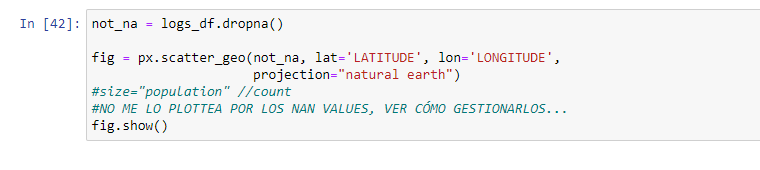

- lo que te com3ento es que los imputes según el dato más proximo a el, ya sea hacia atrás (back-fill) o bien hacia delante (forward-fill)